# Exploring Database

In this notebook, we'll get acquainted with our Curriculum Lattes database by answering some exploratory questions about it, as 


- How many papers are published every year?
- How many papers, on average, every author publishes?
- What are the trending topics in latest years?
- Are there foreign researchrs in Lattes database? Where do they come from?

And some more...

With this analysis, we expect to attend some curiosities about the profile of mathematical researchers in Brazil. 

-----

## Overview

1) Importing dataframe with information on published papers and start exploration (answer some initial questions and create visualizations along the way) <br>
2) Exploring some temporal trends per field of research <br>
3) Analysing the number of publications per author/field and creating a ranking <br>
4) Trending topics: what are the most researched topics in latest years?  <br>
5) Mapping researchers nationalities and their work country

-----



### 0) First of all, let's import a few things...

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

### 1) Importing papers dataframe

In [25]:
df = pd.read_csv('views/Papers.csv', sep=';', encoding='latin-1', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138465 entries, 0 to 138465
Data columns (total 9 columns):
@NUMERO-IDENTIFICADOR    135027 non-null float64
_id                      138465 non-null object
NOME-COMPLETO            138465 non-null object
TITULO-DO-ARTIGO         138465 non-null object
ANO-DO-ARTIGO            138465 non-null object
JOURNAL                  138101 non-null object
PALAVRAS-CHAVE-ARTIGO    68947 non-null object
COAUTORES                138465 non-null object
CHAVE_ARTIGO             138465 non-null object
dtypes: float64(1), object(8)
memory usage: 10.6+ MB


<br>

Now that we already have our dataset ready, let's begin exploring some preliminaries information about the profile of mathematical research in Brazil.

We'll begin answering some simple questions, like..

----


**How many brazilian researchers are there in the mathematical field?**

In [26]:
print('# of researchers in "great" mathematics field: ', df['_id'].unique().shape[0])

# of researchers in "great" mathematics field:  9984


**How many published papers we have in our database?**

In [27]:
# removing duplicate publications
df.sort_values(by='ANO-DO-ARTIGO', inplace=True, ascending=False)

In [28]:
df_pub_unique = df.drop_duplicates("CHAVE_ARTIGO", keep='first')

In [29]:
print('# removed publications: ', df.shape[0] - df_pub_unique.shape[0])

# removed publications:  27561


In [30]:
print('# of publications:', df_pub_unique['CHAVE_ARTIGO'].unique().shape[0])

# of publications: 110904


<br>

**Now, let's take a closer look at the number of published papers and try to separate in years.**

In [31]:
# preparing dataframe to plot (from 1980 to 2019 - that's why [:39])
df_plot = pd.DataFrame(df_pub_unique['ANO-DO-ARTIGO'].value_counts(ascending=False)[:39]).copy()
df_plot.sort_index(inplace=True)

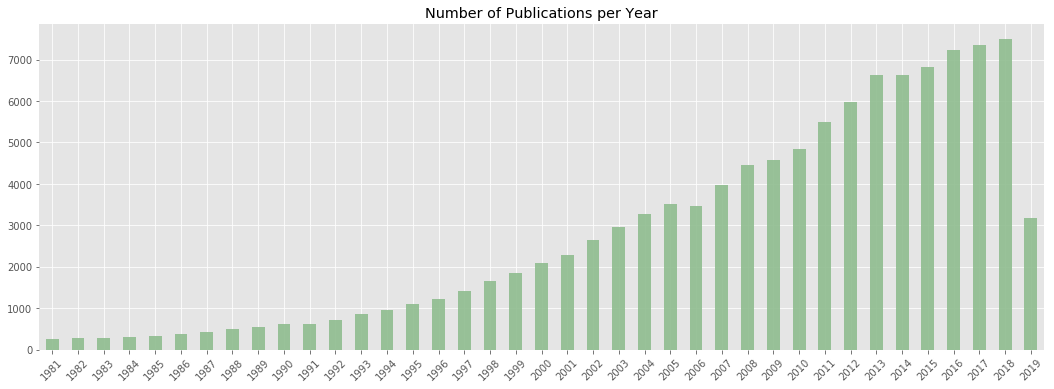

In [32]:
# preparing plot
ax = df_plot.plot(kind='bar', legend=False, title='Number of Publications per Year', figsize=(18,6),
                 color='darkseagreen',  alpha=0.9)

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
#ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)

# x-ticks
#plt.xlabel('Year')
plt.xticks(rotation=45)

#saving fig
plt.savefig('viz/Publicacoes_por_ano.png', bbox_inches='tight')

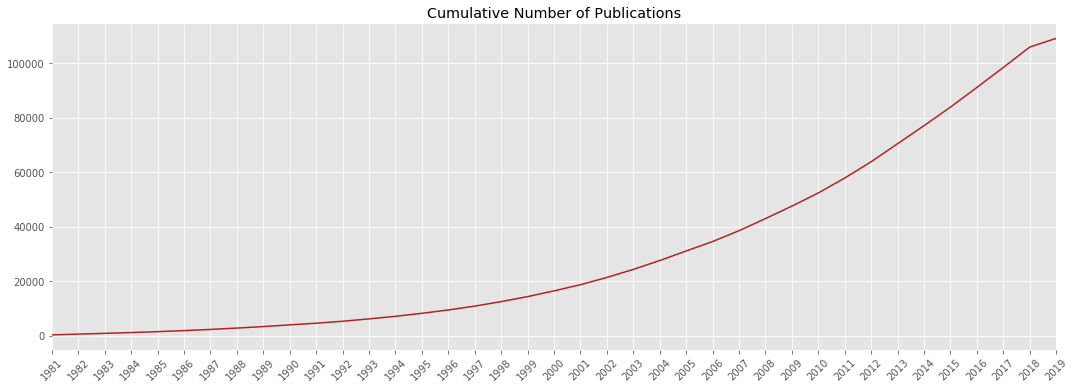

In [33]:
# cumulative publications
df_plot['cumulative'] = df_plot.cumsum()

# plotting
ax = df_plot['cumulative'].plot(color='firebrick', figsize=(18,6), title='Cumulative Number of Publications')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
#ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)

# preparing x-ticks
labels = sorted(list(df_plot.index))
plt.xticks(np.arange(len(labels)), labels)

#plt.xlabel('Year')
plt.xticks(rotation=45)

# saving fig
plt.savefig('viz/Publicacoes_acumulado.png', bbox_inches='tight')

<br>

**What about the Journals with most publications?**

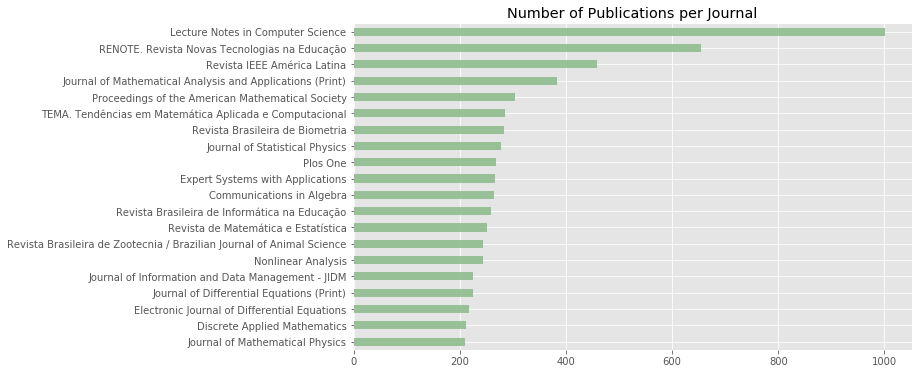

In [61]:
ax = df_pub_unique['JOURNAL'].value_counts()[:20].sort_values(ascending=True).plot(kind='barh', 
                                                color='darkseagreen', figsize=(10,6),
                                                alpha=0.9, title='Number of Publications per Journal')

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
#ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
#plt.ylim(0,1200)

# x-ticks
plt.xticks(rotation=0)

plt.savefig('viz/Journals.png', bbox_inches='tight')

<br>

### 2) Moving on, let's segmentate these numbers per field of research

To do this, we'll import one more dataframe.

In [35]:
authors = pd.read_csv('views/Authors.csv', sep=';', encoding='latin-1', index_col=0)
authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11418 entries, 0 to 11417
Data columns (total 15 columns):
@DATA-ATUALIZACAO        11418 non-null object
@NUMERO-IDENTIFICADOR    10960 non-null float64
_id                      11418 non-null object
NOME-COMPLETO            11418 non-null object
AREA-ATUACAO             11405 non-null object
GRANDE-AREA              11418 non-null object
AREA                     11413 non-null object
SUB-AREA                 9042 non-null object
ESPECIALIDADE            5921 non-null object
NOME-INSTITUICAO         9947 non-null object
UF-INSTITUICAO           9268 non-null object
PAIS-INSTITUICAO         10000 non-null object
PAIS                     10416 non-null object
NOME-CITACOES            11418 non-null object
CODIGO-INSTITUICAO       9948 non-null object
dtypes: float64(1), object(14)
memory usage: 1.4+ MB


In [36]:
print('# of Authors:', authors['NOME-COMPLETO'].unique().shape[0])

# of Authors: 11418


Note that, the number above if higher then what we had before. That's because some authors didn't publish any paper or, at least, haven't updated their Lattes curriculum with their publications. So...

In [37]:
print("# of authors that didn't report any published paper on Lattes:", 
      authors['NOME-COMPLETO'].unique().shape[0] - df['_id'].unique().shape[0])

# of authors that didn't report any published paper on Lattes: 1434


Note that, surprisingly, we have more research areas than the three we were focusing on. The logical explanation behind this is that CNPQ reports these curricula as belonging to the field of *Mathematics*, for example, but the authors of some curricula may autoreport in a different field.

So, as our main focus is in *Mathematics, Statistics and Computer Sciences*, we'll aggregate the counting of the other fields into *Mathematics*.

In [38]:
# counting authors in every field
df_plot = pd.DataFrame(authors['AREA'].value_counts()).transpose()

# aggregating other fields in "Outras"
df_plot['Matemática'] = df_plot['Matemática'] + df_plot.iloc[:,3:].sum(axis=1)

# dropping other fields
#df_plot = pd.concat([df_plot.iloc[:,:3], df_plot.iloc[:,-1]], axis=1).transpose()

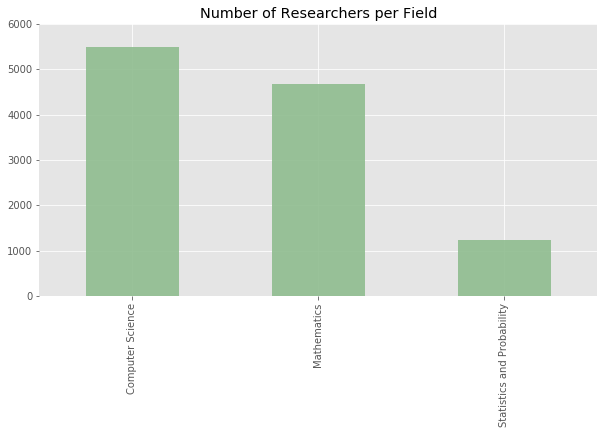

In [39]:
# plotting
ax = df_plot.transpose().iloc[:3,:].plot(kind='bar', color='darkseagreen', figsize=(10,5), legend=False,
                 title='Number of Researchers per Field',  alpha=0.9)

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
#ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
plt.ylim(0,6000)

# x-ticks
labels = ['Computer Science', 'Mathematics', 'Statistics and Probability']
plt.xticks(np.arange(len(labels)), labels, rotation=90)

plt.savefig('viz/Pesquisadores_area.png', bbox_inches='tight')

<br>

### 3) Now, let's sort all authors according to the number of publications

In [40]:
# ranking of publications
authors_ranking = df_pub_unique['NOME-COMPLETO'].value_counts().copy()

# organizing the ranking dataframe
authors_ranking = pd.DataFrame(authors_ranking).reset_index()

# renaming columns
authors_ranking.rename(columns={'index':'NOME-COMPLETO', 'NOME-COMPLETO':'N_PUBLICACOES'}, inplace=True)

# saving to csv
authors_ranking.to_csv('viz/ranking_autores.csv', sep=';', encoding='latin-1',
                                                    header=False)

In [43]:
authors_ranking.head()

,NOME-COMPLETO,N_PUBLICACOES
0,Paulo Roberto Cecon,619
1,Gláucia Maria Bovi Ambrosano,591
2,Maria do Rosario Dias de Oliveira Latorre,353
3,Jose Carlos Barbosa,328
4,José Roberto Pereira Lauris,297


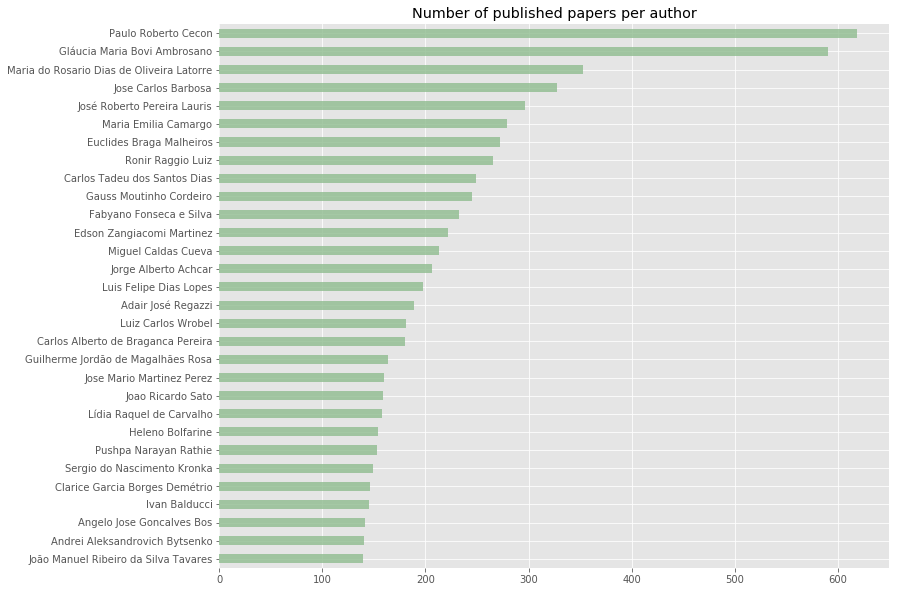

In [66]:
ax = authors_ranking[:30].sort_values('N_PUBLICACOES',ascending=True).plot(kind='barh', 
                                   color='darkseagreen', legend=False, figsize=(12,10),
                                   title='Number of published papers per author',  alpha=0.8)

# removing frames
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# horizontal grid lines
#ax.yaxis.grid(zorder=0,which="major", color='gray', linestyle=':', linewidth=0.6)
#plt.ylim(0,6000)

# x-ticks
labels = list(authors_ranking['NOME-COMPLETO'][:30][::-1])
plt.yticks(np.arange(len(labels)), labels, rotation=0)

plt.savefig('viz/Ranking_autores.png', bbox_inches='tight')

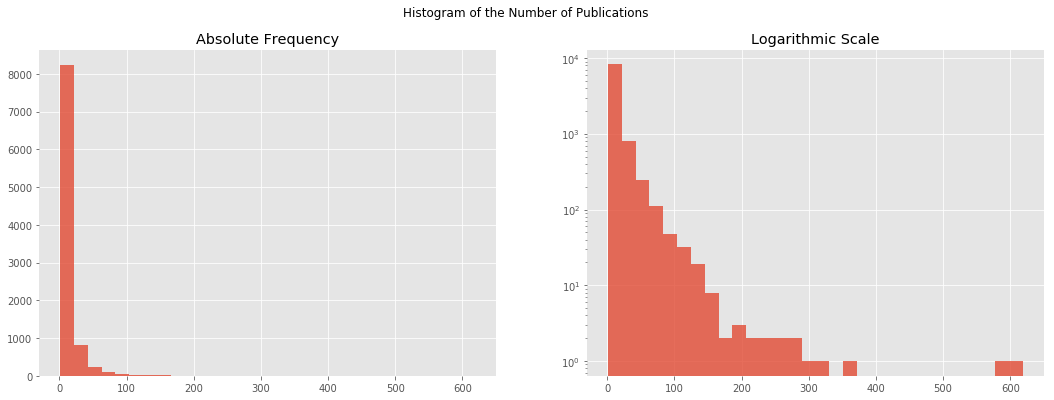

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(18,6))

ax[0].hist(authors_ranking['N_PUBLICACOES'], bins=30,  alpha=0.8)
ax[1].hist(authors_ranking['N_PUBLICACOES'], bins=30, log=True,  alpha=0.8)

# aesthetics
plt.suptitle('Histogram of the Number of Publications')
ax[0].set_title('Absolute Frequency')
ax[1].set_title('Logarithmic Scale')

# removing frames
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

# removing frames
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

plt.savefig('viz/Histograma_publicacoes_por_autor.png', bbox_inches='tight')

<br>

**Now, let's do a ranking with the number of publications per field of research**

In [68]:
# merging dataframes to get number of publications per author
authors_merged = pd.merge(authors, authors_ranking, on='NOME-COMPLETO', how='left')

In [69]:
# grouping per field of research
area_pub = pd.DataFrame(authors_merged.groupby('AREA').sum()['N_PUBLICACOES'])

In [70]:
# sorting and transposing
area_pub = area_pub.sort_values('N_PUBLICACOES', ascending=False).transpose()

In [71]:
# agregating other areas into mathematics (as CNPQ claimed)
area_pub['Matemática'] = area_pub['Matemática'] + area_pub.iloc[:,3:].sum(axis=1)

# selecting the three fields (Mathematics, Statistics and Computer Science)
area_pub = area_pub.iloc[:,:3].transpose()

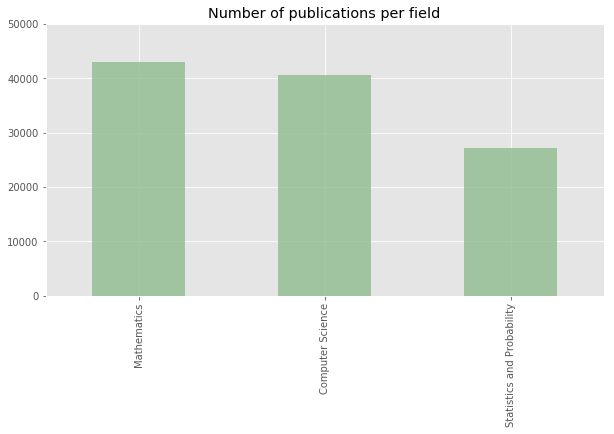

In [72]:
# Plotting
ax = area_pub.plot(kind='bar', legend=False, color='darkseagreen', figsize=(10,5), alpha=0.8)

# aesthetics
ax.set_xlabel('')
ax.set_ylim((0,50000))

labels = ['Mathematics', 'Computer Science', 'Statistics and Probability']

ax.set_title('Number of publications per field')

plt.xticks(np.arange(len(labels)), labels)

plt.savefig('viz/Publicacoes_por_area.png', bbox_inches='tight')

### 4) Trending Topics

In [73]:
papers = pd.read_csv('views/Papers.csv', sep=';', encoding='latin-1')

In [74]:
papers_years = papers.sort_values(by='ANO-DO-ARTIGO',
                   ascending=True).drop_duplicates(subset='NOME-COMPLETO')[['NOME-COMPLETO',
                                                                           'ANO-DO-ARTIGO']]
papers_years.columns = ['NOME-COMPLETO','YEAR']
authors = pd.merge(authors,papers_years,on='NOME-COMPLETO',how='left')

authors['YEAR'] = pd.to_numeric(authors['YEAR'],errors='coerce')

In [75]:
# creating cumulative dataframe per subfield of research
trend = authors[['_id','NOME-COMPLETO', 'GRANDE-AREA', 'AREA', 'SUB-AREA', 'YEAR']].copy()

# grouping and calculating cumulative sums inside every subfield
trend = trend.groupby(['SUB-AREA','YEAR']).count().groupby("SUB-AREA").cumsum().reset_index()

# renaming column
trend.rename(columns={'SUB-AREA':'TOPICS'}, inplace=True)

In [76]:
# list of all subfields
sub_areas = list(authors['SUB-AREA'].value_counts().index)

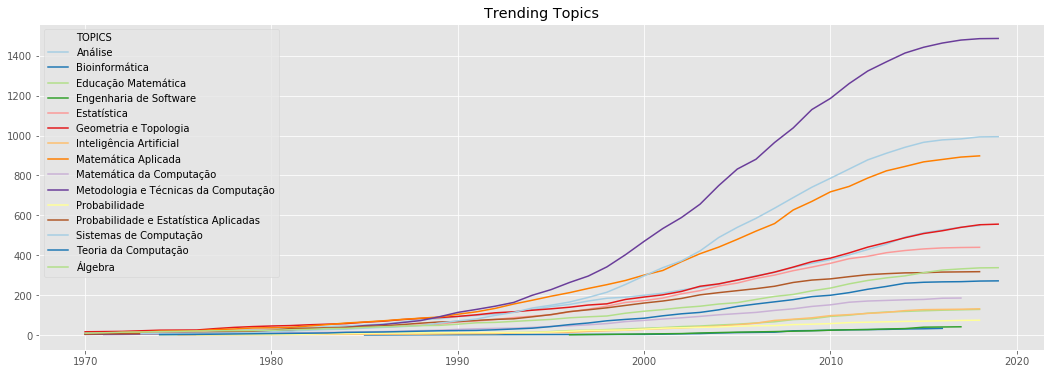

In [77]:
plt.figure(figsize=(18,6))
#plt.xticks(rotation=45)

sns.lineplot(x='YEAR', y='_id', hue='TOPICS', 
             data= trend[(trend['TOPICS'].isin(sub_areas[:15])) & (trend['YEAR']>=1970)],
            palette='Paired')
plt.ylabel('')
plt.xlabel('')

plt.title('Trending Topics')
plt.savefig('viz/trending_topics.png')

### 5) Mapping Nationalities and Work Country

In this topic, we'll try to answer the following questions:

- Where do mathematical researches registered on Lattes database come from?
- In which country do they work?

#### Choropleth map of Lattes researchers nationalities

In [78]:
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [79]:
temp = pd.DataFrame(authors['PAIS'].value_counts())
temp.reset_index(inplace=True)

temp = pd.melt(temp, id_vars='index', value_vars='PAIS')

In [80]:
translate_country_names = {'Bélgica':'Belgium', 'Luxemburgo':'Luxembourg', 'Albânia':'Albania',
                           'Guatemala':'Guatemala', 'Austria':'Austria', 'Alemanha':'Germany',
                           'República Tcheca':'Czech republic', 'Sérvia':'Serbia',
                           'Austrália':'Australia', 
                           'Gana':'Ghana', 'Lituânia':'Lithuania', 'Nepal':'Nepal', 'Suécia':'Sweden',
                           'Irã':'Iran', 'Belarus':'Belarus', 'Macedônia':'Macedonia',
                           'Ucrânia':'Ukraine','Cuba':'Cuba', 'Argélia':'Algeria', 'Equador':'Ecuador',
                           'Noruega':'Norway', 'Islândia':'Iceland', 'Peru':'Peru', 
                           'Portugal':'Portugal',
                           'Marrocos':'Morocco', 'Uruguai':'Uruguay', 'Namíbia':'Namibia',
                           'Estados Unidos':'United States', 'Índia':'India', 'Finlândia':'Finland',
                           'México':'Mexico', 'Hong Kong':'Hong Kong', 'Panamá':'Panama',
                           'Vietnã':'Vietnam', 'Cabo Verde':'Cape Verde', 'Grécia':'Greece', 
                           'Colômbia':'Colombia', 'Rússia':'Russia', 'Israel':'Israel', 
                           'Tunísia':'Tunisia', 'Itália':'Italy', 'Angola':'Angola', 'Brasil':'Brazil',
                           'Coréia do Sul':'South Korea', 'Japão':'Japan', 'Líbano':'Lebanon', 
                           'Suriname':'Suriname', 'China':'China', 'Polônia':'Poland', 'Espanha':'Spain',
                           'Paquistão':'Paquistan', 'Chipre':'Cyprus', 'Honduras':'Honduras',
                           'Líbia':'Libya', 'Nigéria':'Nigeria', 'Turquia':'Turkey', 'Hungria':'Hungary',
                           'Chile':'Chile', 'Venezuela':'Venezuela', 'Tailândia':'Thailand', 
                           'Letônia':'Latvia', 'Grã-Bretanha':'Great-Britain', 'Geórgia':'Georgia', 
                           'Paraguai':'Paraguay', 'Bolívia':'Bolivia', 'Holanda':'Netherlands',
                           'Argentina':'Argentina', 'Inglaterra':'England', 
                           'Burkina Fasso':'Burkina Fasso',
                           'Romênia':'Romania', 'Bulgária':'Bulgaria', 'Moçambique':'Mozambique',
                           'Dinamarca':'Denmark', 'França':'France', 'Eslováquia':'Slovakia', 
                           'Suiça':'Switzerland', 'Nova Zelândia':'New Zealand', 'Canadá':'Canada',
                           'Camarões':'Cameroon', 'Irlanda':'Ireland', 'Escócia':'Scotland',
                           'África do Sul':'South Africa', 'Malásia':'Malaysia', 
                           'Rep.Centro-Africana':'Central African Republic', 'Sudão':'Sudan',
                           'Irlanda do Norte':'Northern Ireland', 'Cingapura':'Singapore', 
                           'Gales':'Wales', 'Eslovênia':'Slovenia'}

In [81]:
temp['index'] = temp['index'].apply(lambda x:translate_country_names[x])

In [88]:
temp['log_value'] = temp['value'].apply(np.log)

In [91]:
temp['log_value'] = temp['log_value'].apply(lambda x:round(x,2))

In [128]:
temp['text'] = 'Number of Researchers:  ' + temp['value'].astype(str)

In [130]:
# preparing dict data
data = dict(
        type = 'choropleth',
        colorscale = 'aggrnyl',
        reversescale = True,
        locations = temp['index'],
        locationmode = "country names",
        text = temp['text'],
        z = temp['log_value'],
        colorbar = {'title' : 'Log-scale'}
      ) 

# defining layout
layout = dict(title = 'Researchers nationalities',
                geo = dict(showframe = False,projection = {'type':'equirectangular'})
             )

# creating and displaying figure
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

# saving html
choromap.write_html('viz/researchers_nationality.html')

# saving png
# choromap.write_image('viz/Researchers_Nationalities.png')

#### Choropleth map of countries where researchers on Lattes are working

In [133]:
temp = pd.DataFrame(authors['PAIS-INSTITUICAO'].value_counts())
temp.reset_index(inplace=True)

temp = pd.melt(temp, id_vars='index', value_vars='PAIS-INSTITUICAO')
#temp.head()

In [134]:
# translating countries names
temp['index'] = temp['index'].apply(lambda x:translate_country_names[x])

# applying log-scale
temp['log_value'] = temp['value'].apply(np.log)
temp['log_value'] = temp['log_value'].apply(lambda x:round(x,2))

# text-label column
temp['text'] = 'Number of Researchers:  ' + temp['value'].astype(str)

In [136]:
data = dict(
        type = 'choropleth',
        colorscale = 'aggrnyl',
        reversescale = True,
        locations = temp['index'],
        locationmode = "country names",
        text = temp['text'],
        z = temp['log_value'],
        colorbar = {'title' : 'Log-scale'}
      ) 

layout = dict(title = 'Researchers working worldwide',
                geo = dict(showframe = False,projection = {'type':'equirectangular'})
             )

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

choromap.write_html('viz/researchers_working_worldwide.html')

### End of this notebook.